In [111]:
import pandas as pd

# Clean data

In [235]:
data = pd.read_csv('/media/jess/DATA/PhD/cnn_bakeoff2/outputs/model_results.csv')
data['number_of_images'] = data['number_of_images'].astype(float)
data['fold'] = data['fold'].astype(float)
data['mAP'] = data['mAP'].astype(float)
data

,number_of_images,model,fold,mAP,folder
0,10.0,yolov8n,1.0,0.435,14_classes
1,10.0,yolov8n,2.0,0.970,14_classes
2,10.0,yolov8n,3.0,0.995,14_classes
3,10.0,yolov8n,4.0,0.995,14_classes
4,10.0,yolov8n,5.0,0.995,14_classes
...,...,...,...,...,...
995,1000.0,yolov8x,1.0,0.989,10_classes_b
996,1000.0,yolov8x,2.0,0.995,10_classes_b
997,1000.0,yolov8x,3.0,0.995,10_classes_b
998,1000.0,yolov8x,4.0,0.995,10_classes_b


## Get mean from each model

In [236]:
import numpy as np

data_stats = data.groupby(['folder', 'number_of_images', 'model']).agg(mean=('mAP', 'mean'), sd=('mAP', 'std')).reset_index()
data_stats

,folder,number_of_images,model,mean,sd
0,10_classes_a,10.0,yolov8l,0.5374,0.119980
1,10_classes_a,10.0,yolov8m,0.8144,0.241819
2,10_classes_a,10.0,yolov8n,0.6124,0.254729
3,10_classes_a,10.0,yolov8s,0.8536,0.271613
4,10_classes_a,10.0,yolov8x,0.5114,0.128955
...,...,...,...,...,...
195,5_classes_b,1000.0,yolov8l,0.9612,0.015450
196,5_classes_b,1000.0,yolov8m,0.9534,0.010807
197,5_classes_b,1000.0,yolov8n,0.9654,0.014117
198,5_classes_b,1000.0,yolov8s,0.9706,0.007232


# Plots

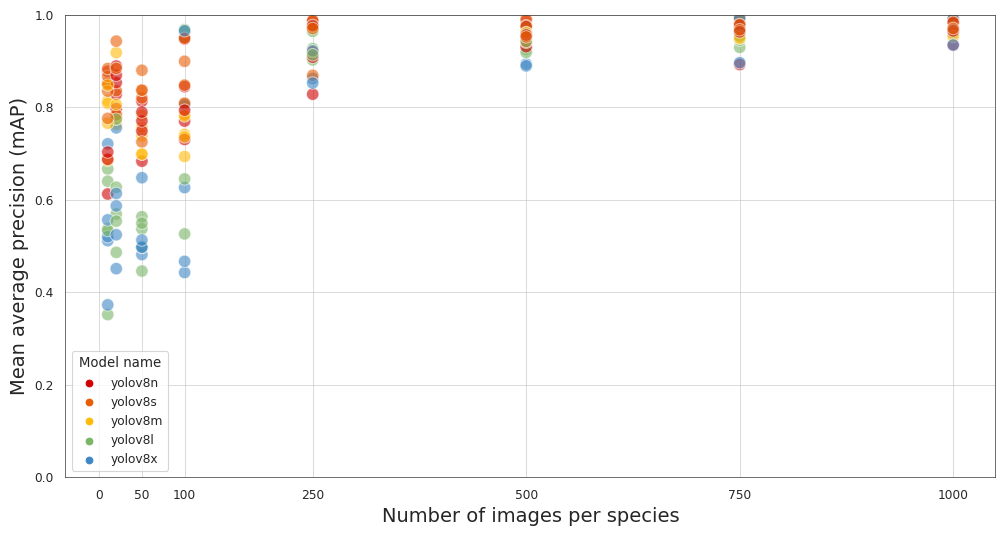

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import fontManager, FontProperties

#theme
sns.set_style('whitegrid', {
    'axes.edgecolor': '0.2'
})
sns.set_context('paper', rc={
    'axes.linewidth': '0.5',
    'grid.linewidth': '0.5',
    'grid.color': '0.9'
})

#increase figure size
plt.figure(figsize = (12, 6))

#palette
palette = ['#D00000', '#E85D04', '#FFBA08', '#7BB567', '#3F88C5']

#scatter plot
sns.scatterplot(
    data=data_stats,
    x=data_stats['number_of_images'],
    y=data_stats['mean'],
    hue='model',
    hue_order=[
        'yolov8n', 'yolov8s', 'yolov8m', 'yolov8l', 'yolov8x'
    ],
    palette=palette,
    s=80,
    alpha=0.6
)

#set limits
plt.ylim(0, 1)

#set axes
plt.xlabel(
    'Number of images per species',
    fontsize = 14
)
plt.ylabel(
    'Mean average precision (mAP)',
    fontsize = 14
)
plt.xticks([0, 50, 100, 250, 500, 750, 1000])

# sns.despine())

#legend settings
plt.legend(
    title='Model name',
    # title_fontsize='x-large',
    # labels=[
    #     'YOLOv8 nano',
    #     'YOLOv8 small',
    #     'YOLOv8 medium',
    #     'YOLOv8 large',
    #     'YOLOv8 X'
    # ],
    # fontsize='large',
    # shadow=True
)

#save plot
# plt.savefig("outputs/map_only.pdf", bbox_inches='tight')
    
#show plot
plt.show()

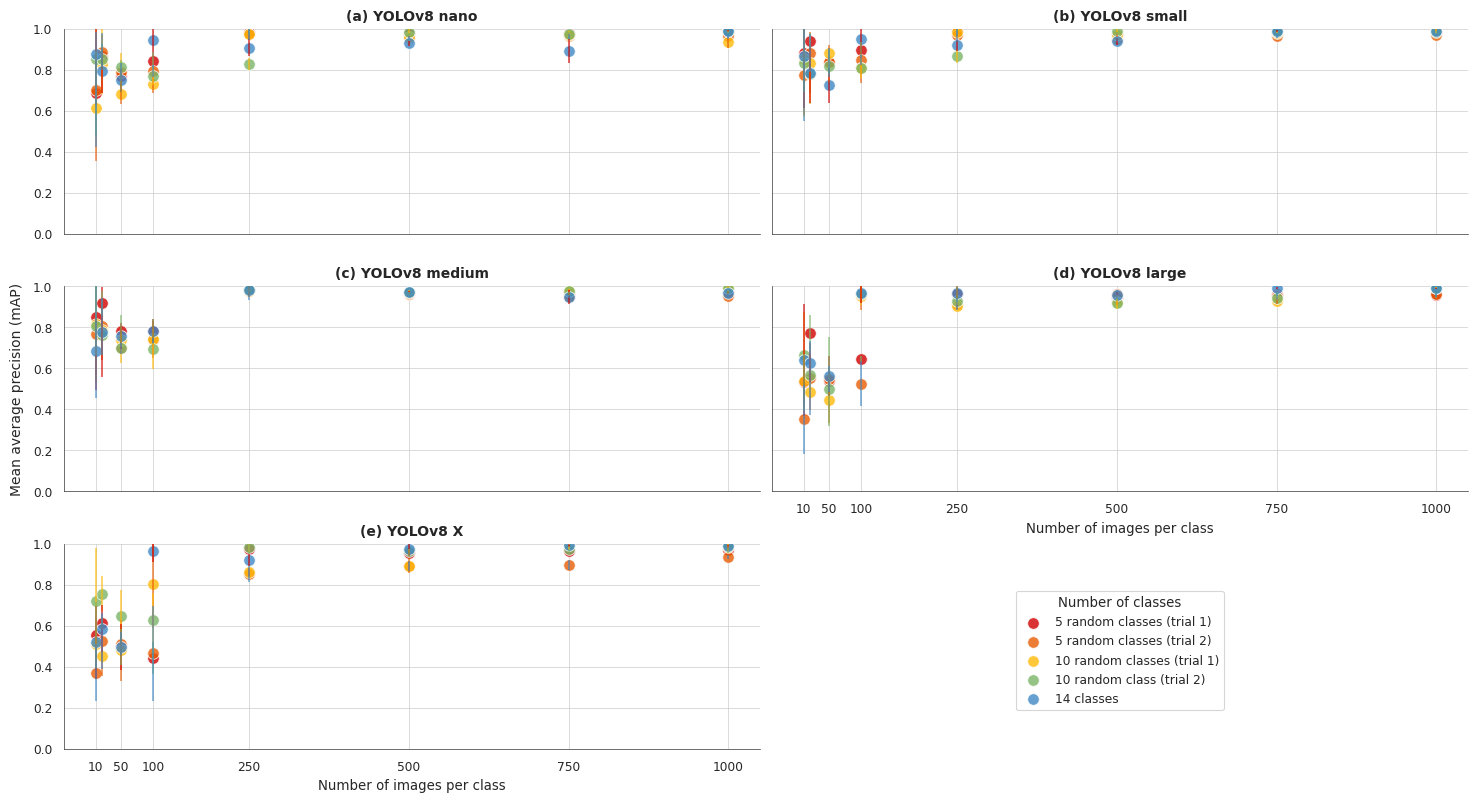

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns


#theme
sns.set_style('whitegrid', {
    'axes.edgecolor': '0.2'
})
sns.set_context('paper', rc={
    'axes.linewidth': '0.5',
    'grid.linewidth': '0.5',
    'grid.color': '0.9'
})

#palette
palette = ['#D00000', '#E85D04', '#FFBA08', '#7BB567', '#3F88C5']

#x axis tick marks
xticks = [
    10,
    50,
    100,
    250,
    500,
    750,
    1000
]

model_order = [
    'yolov8n',
    'yolov8s',
    'yolov8m',
    'yolov8l',
    'yolov8x'
]

legend_order = [
    '5_classes_a',
    '5_classes_b',
    '10_classes_a',
    '10_classes_b',
    '14_classes'
]

labels = [
    'YOLOv8 nano',
    'YOLOv8 small',
    'YOLOv8 medium',
    'YOLOv8 large',
    'YOLOv8 X'
]

# Ensure the order of models is respected in the DataFrame
data_stats['model'] = pd.Categorical(data_stats['model'], categories=model_order, ordered=True)
data_stats = data_stats.sort_values('model')

#initialise the grid and add subplots
p = sns.FacetGrid(
    data=data_stats,
    hue='folder',
    hue_order=legend_order,
    palette=palette,
    legend_out=False,
    col='model',
    col_wrap=2,
    height=3,
    aspect=3/1
)

#add scatterplot
p.map(
    sns.scatterplot,
    'number_of_images',
    'mean',
    s=70,
    alpha=0.8
)

#error bars
folder_to_colour = {value: palette[idx] for idx, value in enumerate(data_stats['folder'].unique())}
for ax in p.axes.flat:
    model = ax.get_title().split('=')[-1].strip()
    data_subset = data_stats[data_stats['model'] == model]
    folder_groups = data_subset.groupby('folder')
    for name, group in folder_groups:
        colour = folder_to_colour[name]  # Get corresponding color for the group
        ax.errorbar(group['number_of_images'], group['mean'], yerr=group['sd'], fmt='none', ecolor=colour, alpha=0.7)

#set titles
titles = ['(a) YOLOv8 nano', '(b) YOLOv8 small', '(c) YOLOv8 medium', '(d) YOLOv8 large', '(e) YOLOv8 X']
for ax, title in zip(p.axes.flat, titles):
    ax.set_title(title, fontweight = 'bold', fontsize=10)

#set axes
p.set_axis_labels('Number of images per class', '')
p.set(
    ylim=(0,1),
    xticks=xticks
)
plt.subplots_adjust(left=0.12, right=0.9, top=0.9, bottom=0.1)
p.fig.text(0.09, 0.5,
           'Mean average precision (mAP)',
           va='center',
           rotation='vertical',
           fontsize=10)

#legend
plt.legend(
    title='Number of classes',
    labels=['5 random classes (trial 1)',
            '5 random classes (trial 2)',
    '10 random classes (trial 1)',
    '10 random class (trial 2)',
    '14 classes'],
    loc='upper right',
    bbox_to_anchor=(1.675, 0.8)
)

#save plot
plt.savefig("/media/jess/DATA/PhD/cnn_bakeoff2/outputs/facet_plot.pdf", bbox_inches='tight')
plt.savefig("/media/jess/DATA/PhD/cnn_bakeoff2/outputs/facet_plot.png", bbox_inches='tight')
    
#show plot
plt.show()

# Anova

In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Check fold dependancy
So this actually doesn't matter since I'm reporting the mean mAP anyway, so the effect from fold should be averaged out.

## Models

In [133]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

def check_residuals(model):

    # Calculate residuals
    residuals = model.resid

    # Plot residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals, marker='o', linestyle='none')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Observation')
    plt.ylabel('Residual')
    plt.show()

    # Plot residuals vs. fitted values
    fitted = model.fittedvalues
    plt.figure(figsize=(10, 6))
    plt.scatter(fitted, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Residuals vs. Fitted Values')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # QQ plot to check normality
    sm.qqplot(residuals, line='45')
    plt.title('QQ Plot')
    plt.show()

    # Summary statistics for residuals
    print(residuals.describe())

In [239]:
mod1 = ols('mean ~ C(number_of_images) + C(model) + C(folder)',
           data=data_stats).fit()
anova_table = sm.stats.anova_lm(mod1, typ=2)
print(anova_table)
print(mod1.summary())

                       sum_sq     df          F        PR(>F)
C(number_of_images)  3.062396    7.0  53.834071  2.834564e-41
C(model)             0.613338    4.0  18.868338  5.130122e-13
C(folder)            0.073453    4.0   2.259651  6.439947e-02
Residual             1.495285  184.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     30.76
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           3.40e-42
Time:                        13:34:52   Log-Likelihood:                 205.81
No. Observations:                 200   AIC:                            -379.6
Df Residuals:                     184   BIC:                            -326.9
Df Model:                          15                     

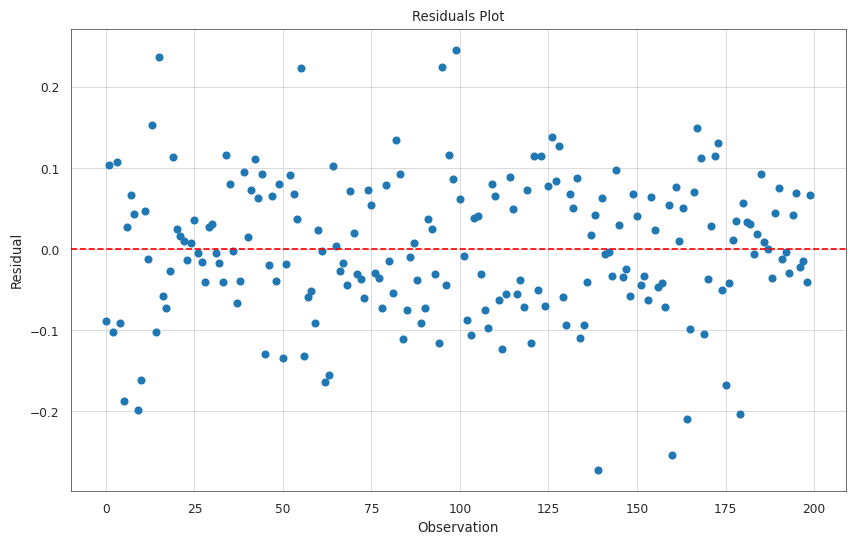

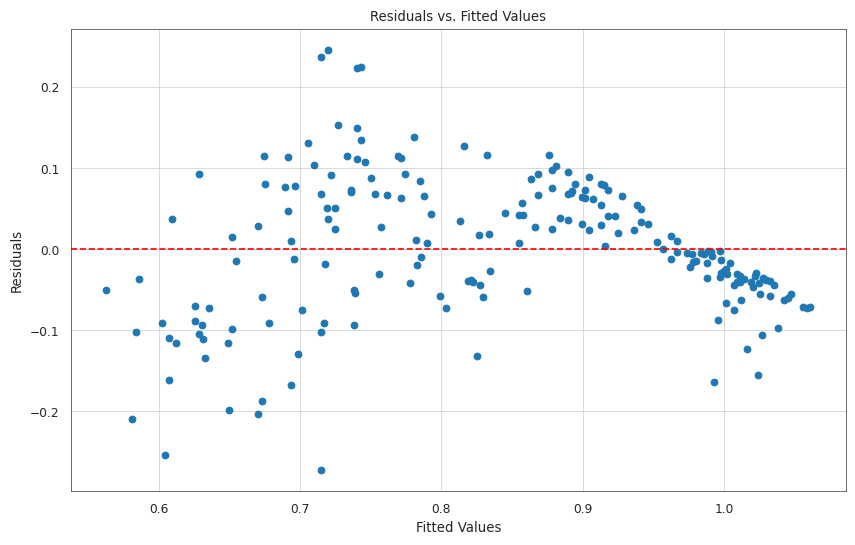

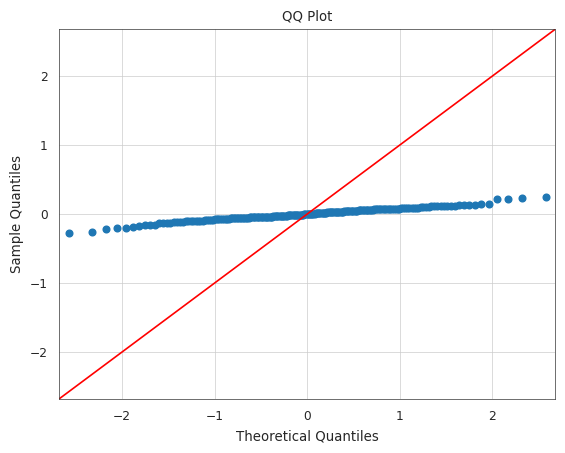

count    2.000000e+02
mean    -5.545564e-16
std      8.668329e-02
min     -2.723760e-01
25%     -5.213575e-02
50%     -3.354500e-03
75%      6.541325e-02
max      2.458340e-01
dtype: float64


In [240]:
check_residuals(mod1)

In [241]:
#the above model needs logging!!
data_stats['log_mean'] = np.log10(data_stats['mean'])
mod2 = ols('log_mean ~ C(number_of_images) + C(model) + C(folder)',
           data=data_stats).fit()
anova_table = sm.stats.anova_lm(mod2, typ=2)
print(anova_table)
print(mod2.summary())

                       sum_sq     df          F        PR(>F)
C(number_of_images)  0.982756    7.0  40.010963  8.029772e-34
C(model)             0.266895    4.0  19.015669  4.185909e-13
C(folder)            0.032718    4.0   2.331061  5.758089e-02
Residual             0.645634  184.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:               log_mean   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     24.36
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           5.73e-36
Time:                        13:35:00   Log-Likelihood:                 289.80
No. Observations:                 200   AIC:                            -547.6
Df Residuals:                     184   BIC:                            -494.8
Df Model:                          15                     

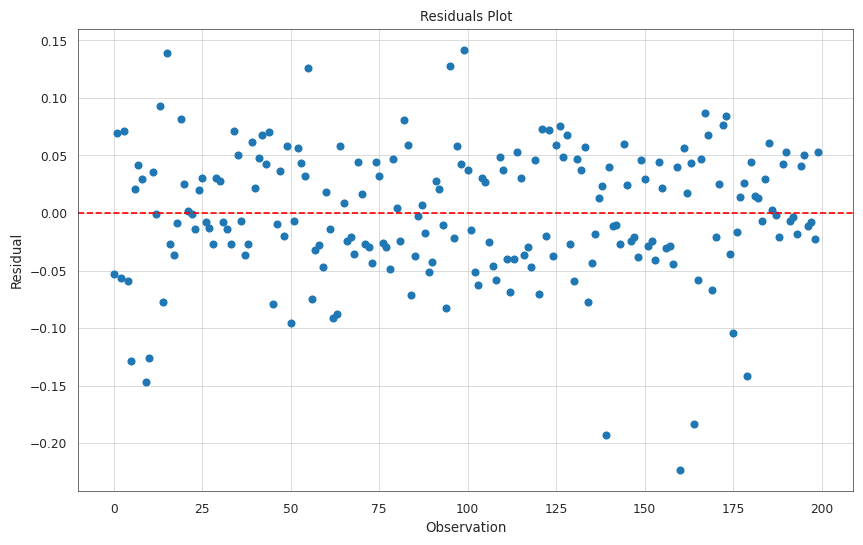

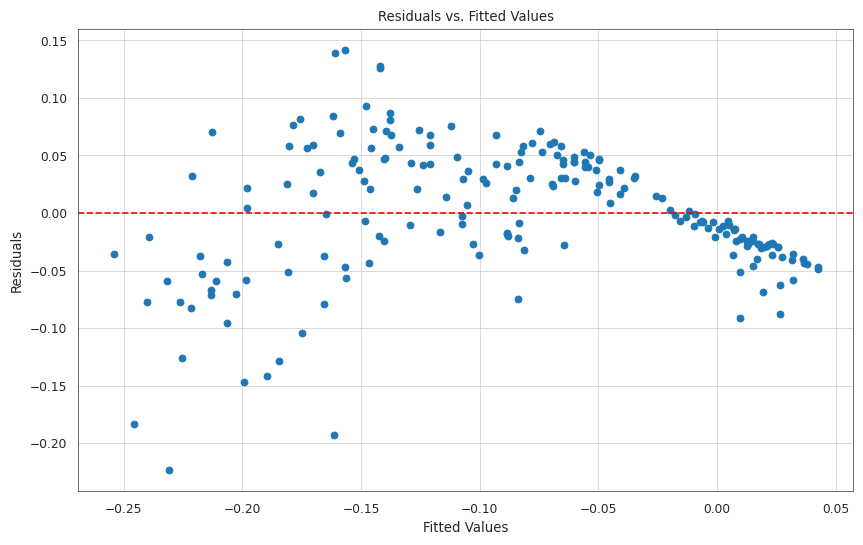

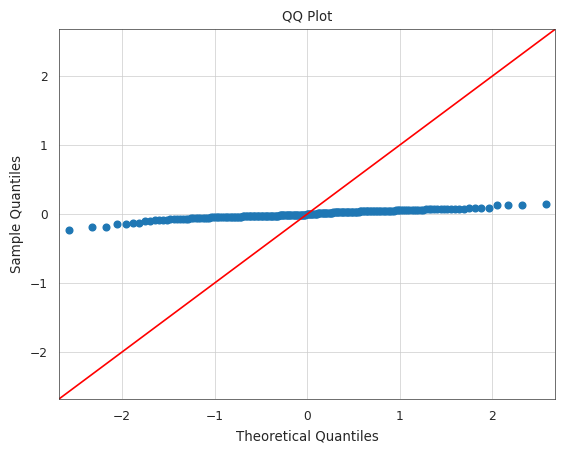

count    2.000000e+02
mean     4.440892e-18
std      5.695956e-02
min     -2.233554e-01
25%     -3.009733e-02
50%     -2.912807e-03
75%      4.258217e-02
max      1.417903e-01
dtype: float64


In [242]:
check_residuals(mod2)

In [243]:
#polynomial transformation
data_stats['sq_mean'] = data_stats['mean']**-2
mod3 = ols('sq_mean ~ C(number_of_images) + C(model) + C(folder)',
           data=data_stats).fit()
anova_table = sm.stats.anova_lm(mod3, typ=2)
print(anova_table)
print(mod3.summary())

                         sum_sq     df          F        PR(>F)
C(number_of_images)   78.764182    7.0  18.392392  1.848960e-18
C(model)              37.503934    4.0  15.325841  7.772776e-11
C(folder)              6.183516    4.0   2.526870  4.227395e-02
Residual             112.566806  184.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                sq_mean   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     13.34
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           2.41e-22
Time:                        13:35:10   Log-Likelihood:                -226.31
No. Observations:                 200   AIC:                             484.6
Df Residuals:                     184   BIC:                             537.4
Df Model:                          15           

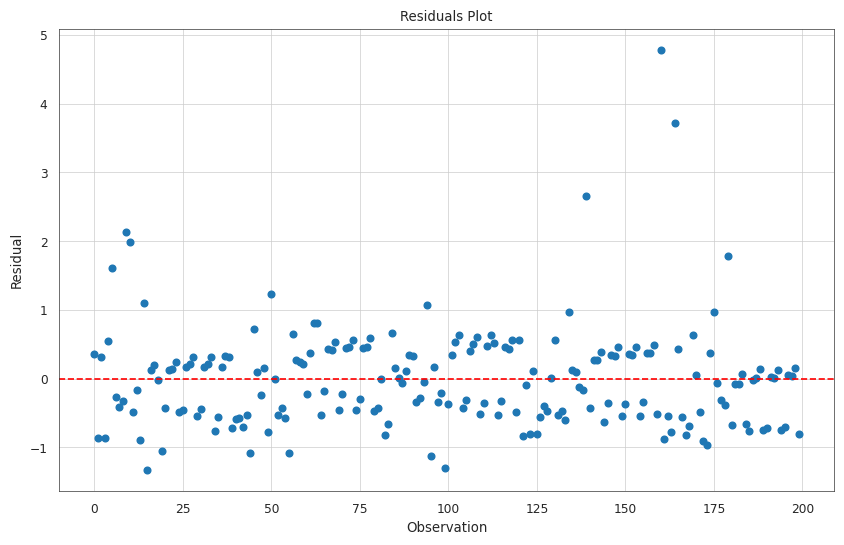

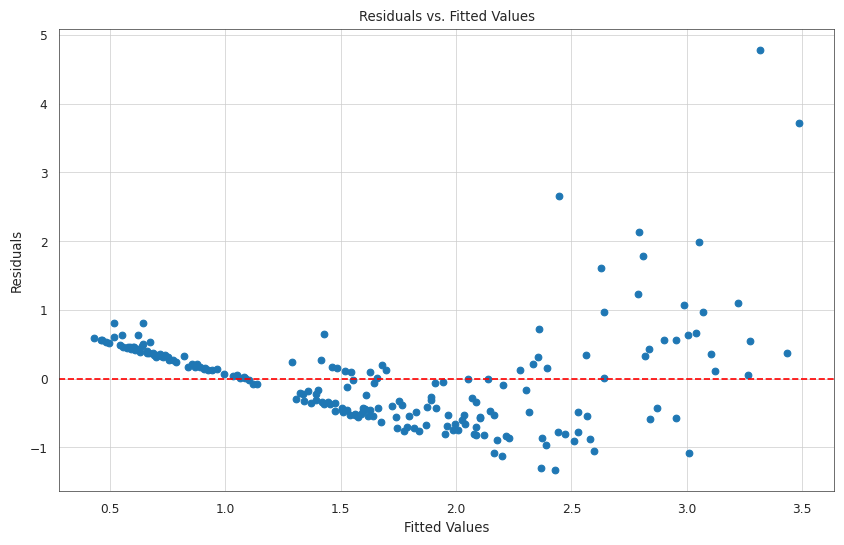

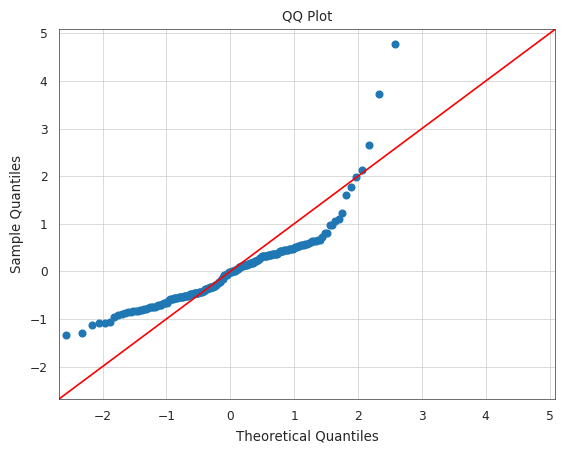

count    2.000000e+02
mean     1.443290e-17
std      7.521053e-01
min     -1.327311e+00
25%     -5.122986e-01
50%     -1.429752e-02
75%      3.632234e-01
max      4.780792e+00
dtype: float64


In [244]:
check_residuals(mod3)

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     10.3308
Link Function:                     IdentityLink Log Likelihood:                                -10228.1946
Number of Samples:                          200 AIC:                                            20479.0508
                                                AICc:                                           20480.5398
                                                GCV:                                                0.0095
                                                Scale:                                              0.0086
                                                Pseudo R-Squared:                                   0.6881
Feature Function                  Lam

/tmp/ipykernel_22597/1103665494.py:17: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


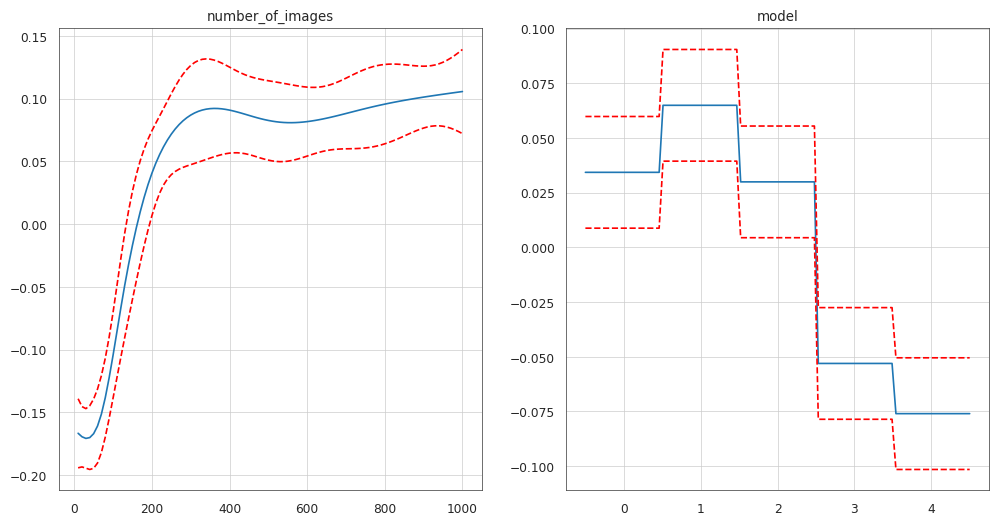

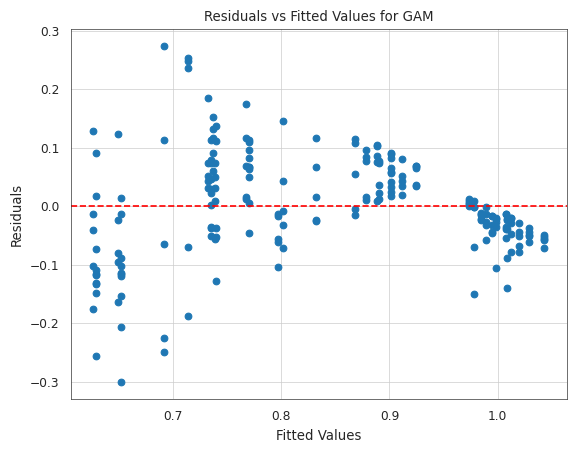

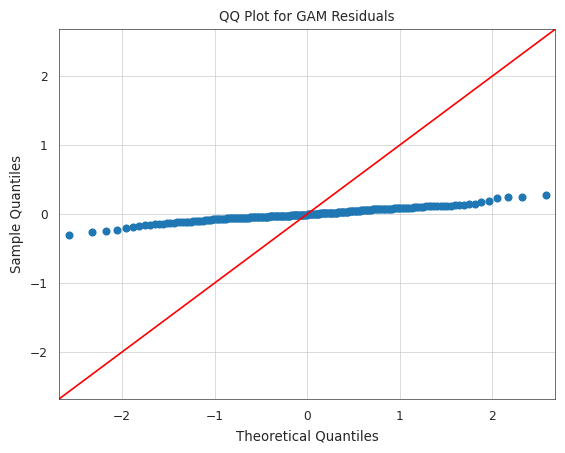

In [245]:
from pygam import LinearGAM, s, f
import numpy as np
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'data_before_aug'
# Transform the categorical variables for the model
data_stats['model_encoded'] = data_stats['model'].astype('category').cat.codes

# Prepare the features and target variable
X = data_stats[['number_of_images', 'model_encoded']]
y = data_stats['mean']

# Fit the GAM model
gam = LinearGAM(s(0) + f(1)).fit(X, y)

# Summary of the model
gam.summary()

# Plot the partial dependence
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
titles = ['number_of_images', 'model']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])
plt.show()

# Residuals vs Fitted Values for GAM
fitted_values = gam.predict(X)
residuals = y - fitted_values
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values for GAM')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# QQ Plot for GAM residuals
sm.qqplot(residuals, line='45')
plt.title('QQ Plot for GAM Residuals')
plt.show()


In [246]:
#logit transformation
#this looks perfect
from scipy.special import logit, expit

data_stats['logit_mean'] = logit(data_stats['mean'])
mod4 = ols('logit_mean ~ C(number_of_images) + C(model) + C(folder)',
           data=data_stats).fit()
anova_table = sm.stats.anova_lm(mod4, typ=2)
print(anova_table)
print(mod4.summary())

                         sum_sq     df          F        PR(>F)
C(number_of_images)  311.353195    7.0  83.637584  8.896913e-54
C(model)              21.284379    4.0  10.005693  2.386786e-07
C(folder)              9.237276    4.0   4.342403  2.222928e-03
Residual              97.852434  184.0        NaN           NaN
                            OLS Regression Results                            
Dep. Variable:             logit_mean   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     42.86
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           7.29e-52
Time:                        13:35:30   Log-Likelihood:                -212.30
No. Observations:                 200   AIC:                             456.6
Df Residuals:                     184   BIC:                             509.4
Df Model:                          15           

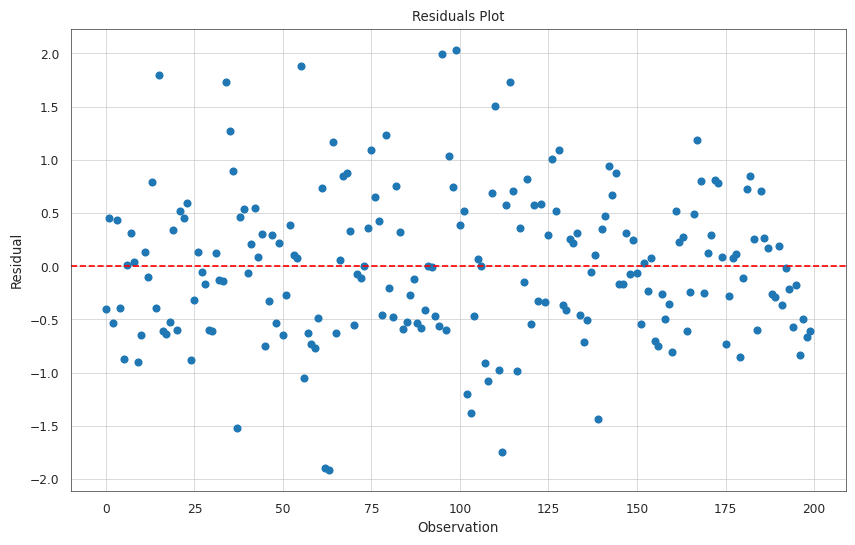

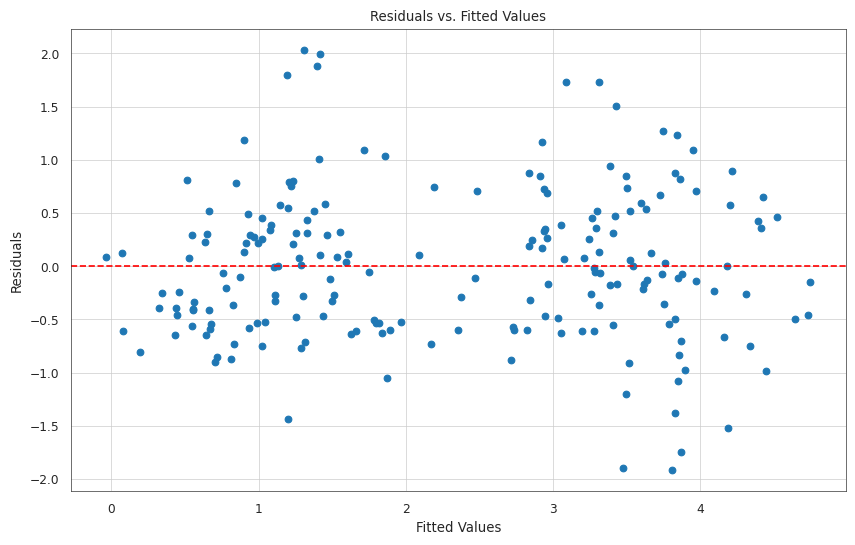

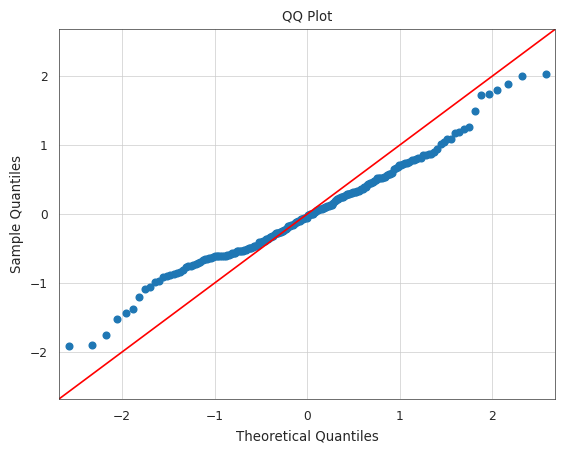

count    2.000000e+02
mean    -1.164624e-15
std      7.012280e-01
min     -1.914933e+00
25%     -5.259316e-01
50%     -3.568824e-02
75%      4.417888e-01
max      2.033429e+00
dtype: float64


In [247]:
check_residuals(mod4)

In [248]:
from statsmodels.formula.api import glm

glm = glm('mean ~ C(number_of_images) + C(model) + C(folder)',
          data=data_stats,
          family=sm.families.Binomial()).fit()
print(glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   mean   No. Observations:                  200
Model:                            GLM   Df Residuals:                      184
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -51.402
Date:                Wed, 12 Jun 2024   Deviance:                       7.0828
Time:                        13:35:40   Pearson chi2:                     7.24
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1425
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

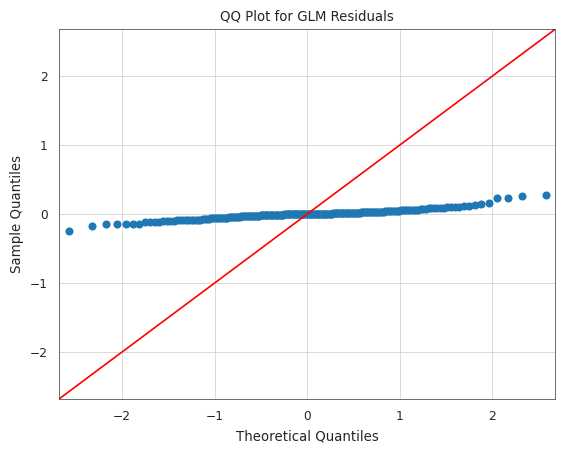

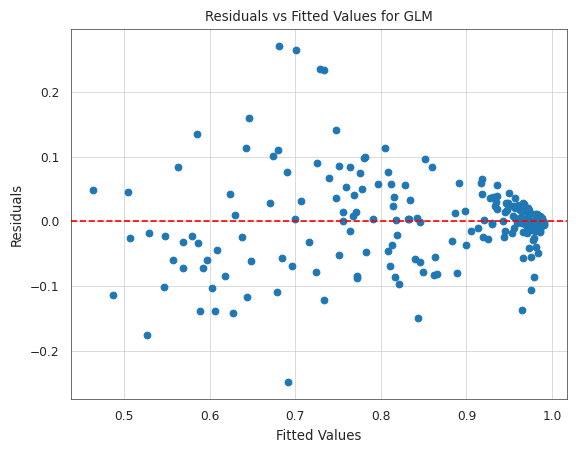

In [249]:
# QQ Plot for GLM residuals
sm.qqplot(glm.resid_response, line='45')
plt.title('QQ Plot for GLM Residuals')
plt.show()

# Residuals vs Fitted Values for GLM
fitted_values = glm.fittedvalues
residuals = glm.resid_response
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values for GLM')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [250]:
#logit transformation
#this looks perfect
from scipy.special import logit, expit

data_stats['logit_mean'] = logit(data_stats['mean'])
glm2 = glm('logit_mean ~ C(number_of_images) + C(model) + C(folder)',
           data=data_stats,
           family=sm.families.Binomial()).fit()
print(glm2.summary())

TypeError: 'GLMResultsWrapper' object is not callable

### Tukey

In [255]:
#model tukey
for folder, group in data_stats.groupby('folder'):
    tukey = pairwise_tukeyhsd(endog=group['mean'],
                              groups=group['model'],
                              alpha=0.05)
    print(folder)
    print(tukey)

10_classes_a
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
yolov8l yolov8m   0.1032 0.7528 -0.1446 0.3511  False
yolov8l yolov8n   0.0657 0.9397 -0.1821 0.3135  False
yolov8l yolov8s   0.1415 0.4821 -0.1063 0.3893  False
yolov8l yolov8x  -0.0239 0.9987 -0.2717  0.224  False
yolov8m yolov8n  -0.0375 0.9922 -0.2854 0.2103  False
yolov8m yolov8s   0.0383 0.9916 -0.2096 0.2861  False
yolov8m yolov8x  -0.1271 0.5855 -0.3749 0.1208  False
yolov8n yolov8s   0.0758 0.9026  -0.172 0.3236  False
yolov8n yolov8x  -0.0896 0.8356 -0.3374 0.1583  False
yolov8s yolov8x  -0.1654  0.327 -0.4132 0.0825  False
-----------------------------------------------------
10_classes_b
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
yolov8l yolov8m   0.0516 0.9473 -0.1508 0.2539  False
yo

In [259]:
#number of images tukey
for folder, group in data_stats.groupby('folder'):
    tukey = pairwise_tukeyhsd(endog=group['mean'],
                              groups=group['number_of_images'],
                              alpha=0.05)
    print(folder)
    print(tukey)

10_classes_a
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  10.0   20.0   0.0114    1.0 -0.2269 0.2496  False
  10.0   50.0  -0.0202    1.0 -0.2584 0.2181  False
  10.0  100.0   0.1416 0.5451 -0.0967 0.3798  False
  10.0  250.0   0.2752 0.0147  0.0369 0.5134   True
  10.0  500.0   0.2781 0.0132  0.0398 0.5163   True
  10.0  750.0    0.304 0.0052  0.0658 0.5423   True
  10.0 1000.0   0.3142 0.0036  0.0759 0.5524   True
  20.0   50.0  -0.0315 0.9998 -0.2698 0.2067  False
  20.0  100.0   0.1302 0.6435 -0.1081 0.3685  False
  20.0  250.0   0.2638 0.0216  0.0255 0.5021   True
  20.0  500.0   0.2667 0.0196  0.0285  0.505   True
  20.0  750.0   0.2927 0.0079  0.0544 0.5309   True
  20.0 1000.0   0.3028 0.0055  0.0645 0.5411   True
  50.0  100.0   0.1617  0.379 -0.0765    0.4  False
  50.0  250.0   0.2953 0.0072  0.0571 0.5336   True
  50.0  500.0   0.2982 0.0065    0.06 0.5365   True